# Perform standard imports

In [1]:
library(ggplot2)

# Load datasets

The datasets loaded below summarizes the results from two different runs of the calculation of systemic risk using minimum density network reconstruction ensembles. The dataframes are as follows:

1. **df0** - dataframe containing results from run without using square root on the prior probabilities for adding an edge
2. **df1** - dataframe containing results from run where square root is applied on the prior probabilities for adding an edge

In [2]:
df0 <- read.csv('md_el_risks_diff_no_sqrt.csv')
df1 <- read.csv('md_el_risks_diff.csv')

In [3]:
head(df0)

,X,a,p,exposure_limit,aggregation,method,risk,risk_diff
,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
1,0,0,0,0.3,mean,md-03ex_lim (mean),9.599100,-4.545046
2,1,0,0,0.3,99p,md-03ex_lim (99p),9.729730,-4.675676
3,2,0,0,0.3,90p,md-03ex_lim (90p),9.675676,-4.621622
4,3,0,0,0.3,80p,md-03ex_lim (80p),9.648649,-4.594595
5,4,0,0,0.3,70p,md-03ex_lim (70p),9.621622,-4.567568
6,5,0,0,0.3,60p,md-03ex_lim (60p),9.621622,-4.567568


In [4]:
head(df1)

,X,a,p,exposure_limit,aggregation,method,risk,risk_diff
,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
1,0,0,0,0.3,mean,md-03ex_lim (mean),9.579614,-4.525559
2,1,0,0,0.3,99p,md-03ex_lim (99p),9.702703,-4.648649
3,2,0,0,0.3,90p,md-03ex_lim (90p),9.648649,-4.594595
4,3,0,0,0.3,80p,md-03ex_lim (80p),9.621622,-4.567568
5,4,0,0,0.3,70p,md-03ex_lim (70p),9.621622,-4.567568
6,5,0,0,0.3,60p,md-03ex_lim (60p),9.594595,-4.540541


## Drop first column
First column only contains index numbers from pandas export of the data

In [5]:
df0 <- subset(df0, select=-c(X))
df1 <- subset(df1, select=-c(X))

In [6]:
head(df0)

,a,p,exposure_limit,aggregation,method,risk,risk_diff
,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
1,0,0,0.3,mean,md-03ex_lim (mean),9.599100,-4.545046
2,0,0,0.3,99p,md-03ex_lim (99p),9.729730,-4.675676
3,0,0,0.3,90p,md-03ex_lim (90p),9.675676,-4.621622
4,0,0,0.3,80p,md-03ex_lim (80p),9.648649,-4.594595
5,0,0,0.3,70p,md-03ex_lim (70p),9.621622,-4.567568
6,0,0,0.3,60p,md-03ex_lim (60p),9.621622,-4.567568


In [7]:
head(df1)

,a,p,exposure_limit,aggregation,method,risk,risk_diff
,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
1,0,0,0.3,mean,md-03ex_lim (mean),9.579614,-4.525559
2,0,0,0.3,99p,md-03ex_lim (99p),9.702703,-4.648649
3,0,0,0.3,90p,md-03ex_lim (90p),9.648649,-4.594595
4,0,0,0.3,80p,md-03ex_lim (80p),9.621622,-4.567568
5,0,0,0.3,70p,md-03ex_lim (70p),9.621622,-4.567568
6,0,0,0.3,60p,md-03ex_lim (60p),9.594595,-4.540541


## Filter for only mean aggregation

In the current draft of the thesis that uses these results, only the mean aggregation is used in conjunction with implementing exposure limits. The rationale is to easily identify changes coming from the use of exposure limits.

Thus, to make analysis here easily comparable with the reported results on the current thesis draft, only the mean aggregation is used in this analysis as well.

In [8]:
df0  <- df0[df0$aggregation == 'mean',]
df1  <- df1[df1$aggregation == 'mean',]

In [9]:
head(df0)

,a,p,exposure_limit,aggregation,method,risk,risk_diff
,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
1,0,0.0,0.3,mean,md-03ex_lim (mean),9.599100,-4.545046
7,0,0.1,0.3,mean,md-03ex_lim (mean),9.449541,-4.692784
13,0,0.2,0.3,mean,md-03ex_lim (mean),9.002611,-4.651259
19,0,0.3,0.3,mean,md-03ex_lim (mean),8.412084,-4.276949
25,0,0.4,0.3,mean,md-03ex_lim (mean),8.049649,-4.292892
31,0,0.5,0.3,mean,md-03ex_lim (mean),7.655322,-4.222889


In [10]:
head(df1)

,a,p,exposure_limit,aggregation,method,risk,risk_diff
,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
1,0,0.0,0.3,mean,md-03ex_lim (mean),9.579614,-4.525559
7,0,0.1,0.3,mean,md-03ex_lim (mean),9.427111,-4.670354
13,0,0.2,0.3,mean,md-03ex_lim (mean),8.987473,-4.636122
19,0,0.3,0.3,mean,md-03ex_lim (mean),8.411751,-4.276616
25,0,0.4,0.3,mean,md-03ex_lim (mean),8.053305,-4.296549
31,0,0.5,0.3,mean,md-03ex_lim (mean),7.669703,-4.237270


# Compare results between two methodologies

Compile significant columns into one data frame to easily compared statistics on results

In [11]:
data_compare <- data.frame(df1$a)
colnames(data_compare) = c('a')

data_compare$p <- df1$p
data_compare$exposure_limit <- df1$exposure_limit

data_compare$risk0 <- df0$risk
data_compare$risk1 <- df1$risk

data_compare$risk_diff0 <- df0$risk_diff
data_compare$risk_diff1 <- df1$risk_diff

head(data_compare)

,a,p,exposure_limit,risk0,risk1,risk_diff0,risk_diff1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0.0,0.3,9.599100,9.579614,-4.545046,-4.525559
2,0,0.1,0.3,9.449541,9.427111,-4.692784,-4.670354
3,0,0.2,0.3,9.002611,8.987473,-4.651259,-4.636122
4,0,0.3,0.3,8.412084,8.411751,-4.276949,-4.276616
5,0,0.4,0.3,8.049649,8.053305,-4.292892,-4.296549
6,0,0.5,0.3,7.655322,7.669703,-4.222889,-4.237270


The data frame named *data_compare* has the following data fields:

1. **a** - the market impact parameter in the systemic risk measure (Huang et al, 2013)
2. **p** - the initial price shock parameter in the systemic risk measure (Huang et al, 2013)
3. **exposure_limit** - the imposed exposure limit on the ensemble used to determine systemic risk
4. **risk0** - systemic risk from ensembles without square root applied on the priors Q
5. **risk1** - systemic risk from ensemble where square root is applied on the priors Q
6. **risk_diff0** - the difference in systemic risk between the actual network and the estimate from risk0 (actual - estimate)
7. **risk_diff1** - the difference in systemic risk between the actual network and the estimate from risk1 (actual - estimate)

Now, we add a column named **d_risk** to denote the quantity **risk0 - risk1**.

In [12]:
data_compare$d_risk <- data_compare$risk0 - data_compare$risk1
head(data_compare)

,a,p,exposure_limit,risk0,risk1,risk_diff0,risk_diff1,d_risk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0.0,0.3,9.599100,9.579614,-4.545046,-4.525559,0.0194864865
2,0,0.1,0.3,9.449541,9.427111,-4.692784,-4.670354,0.0224297297
3,0,0.2,0.3,9.002611,8.987473,-4.651259,-4.636122,0.0151378378
4,0,0.3,0.3,8.412084,8.411751,-4.276949,-4.276616,0.0003324324
5,0,0.4,0.3,8.049649,8.053305,-4.292892,-4.296549,-0.0036567568
6,0,0.5,0.3,7.655322,7.669703,-4.222889,-4.237270,-0.0143810811


In [24]:
min(data_compare$d_risk)

[1] -4.071159

In [26]:
max(data_compare$d_risk)

[1] 4.319292

In [15]:
mean(data_compare$d_risk)

[1] 0.3534565

In [17]:
sd(data_compare$d_risk)

[1] 1.335446

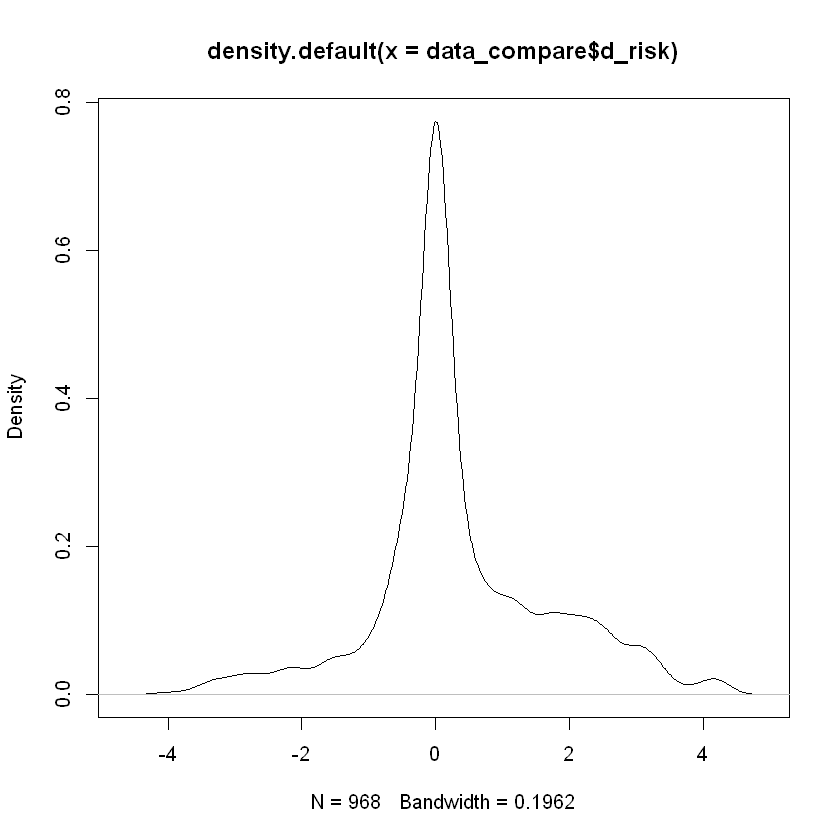

In [16]:
plot(density(data_compare$d_risk))

We see the distribution of the difference of the risk between the two approaches above. Most of the differences seems to lie near zero. Although there are cases where the difference is large.

## Visualizations of trends

To help manipulate colors on the visualizations, columns **a** and **p** are addedd again into the data frame but as categories now.

In [20]:
data_compare$market_impact <- as.factor(data_compare$a)
data_compare$initial_shock <- as.factor(data_compare$p)

### Plot of difference in risk estimates with x-axis describing the initial market impact parameter **p**

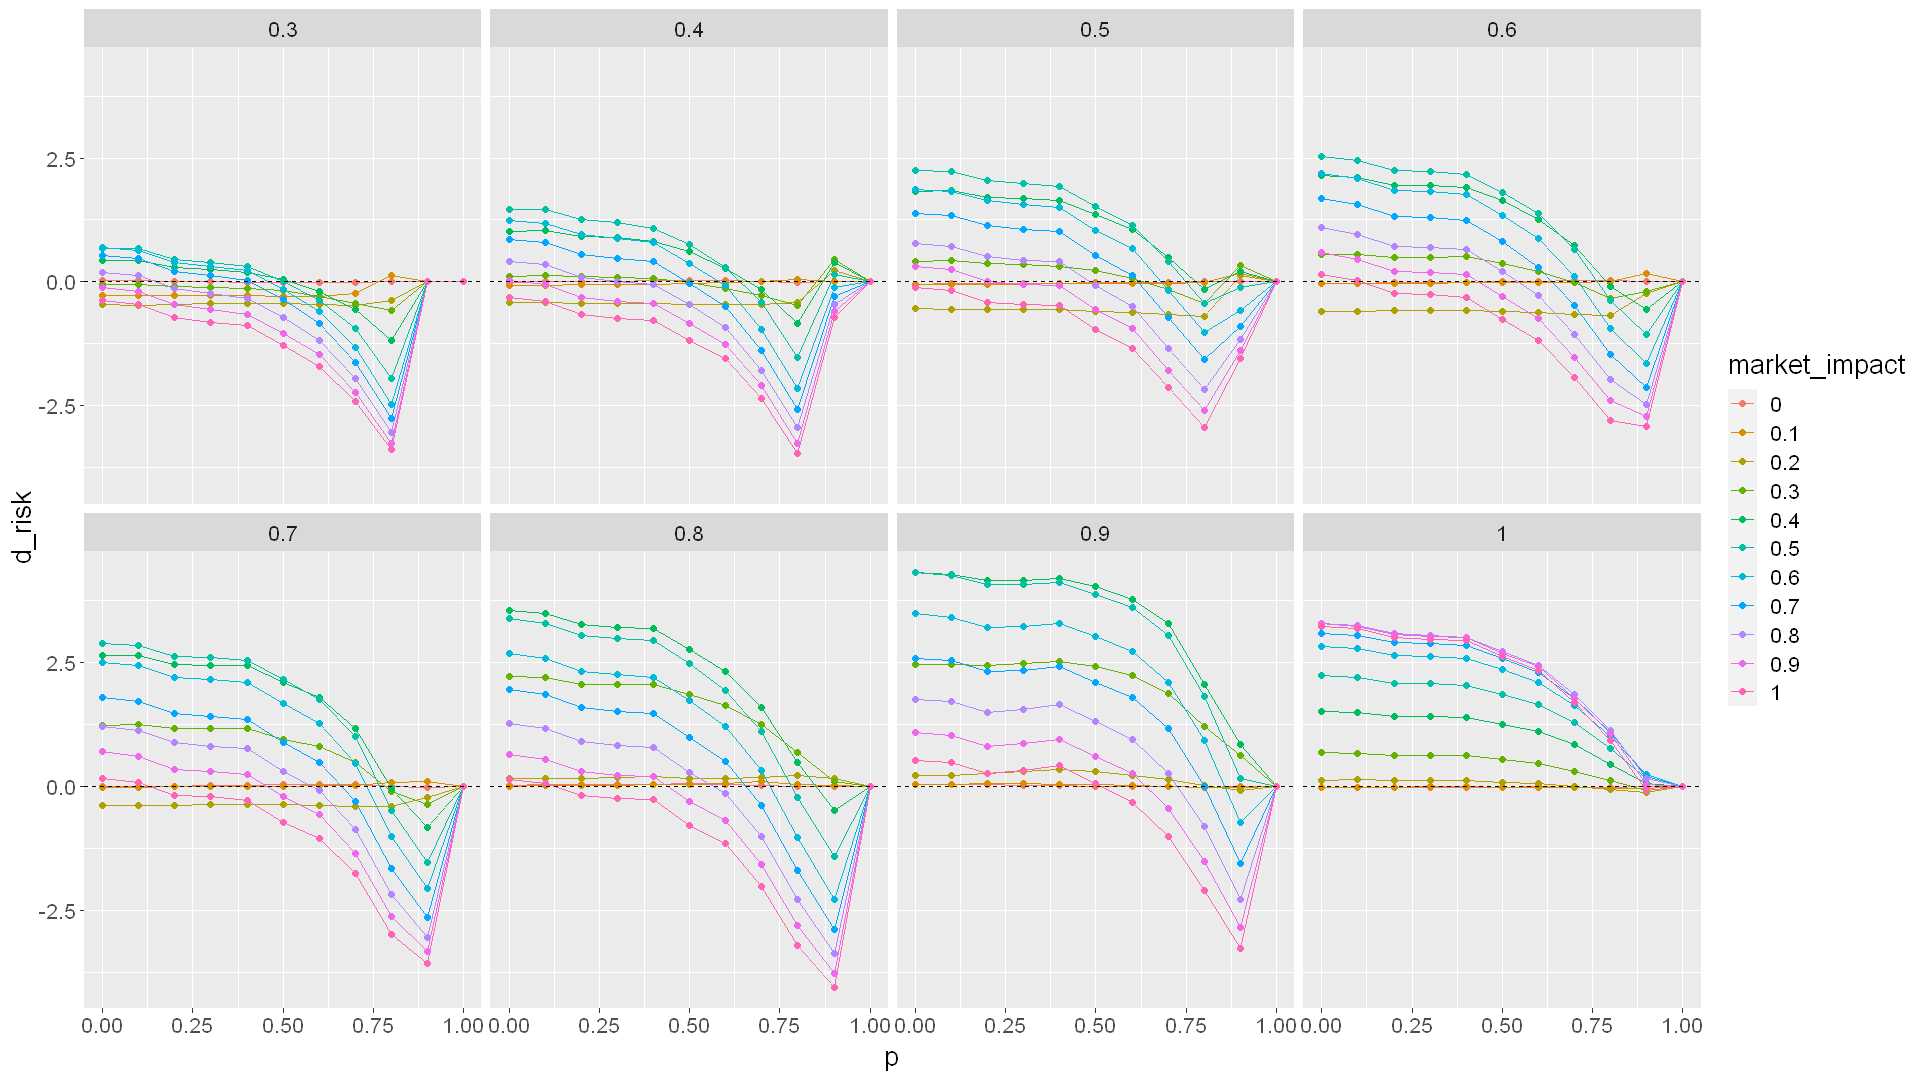

In [21]:
options(repr.plot.width=16, repr.plot.height=9)
facet_try <- ggplot(data=data_compare, aes(x=p, y=d_risk, group=market_impact, color=market_impact)) + geom_line() + 
                geom_point() + geom_hline(yintercept=0.0, linetype='dashed', color='black') +
                theme(text=element_text(size=16))

facet_try + facet_wrap(~exposure_limit, ncol=4)

### Plot of difference in risk estimates with x-axis describing the market impact parameter *a*

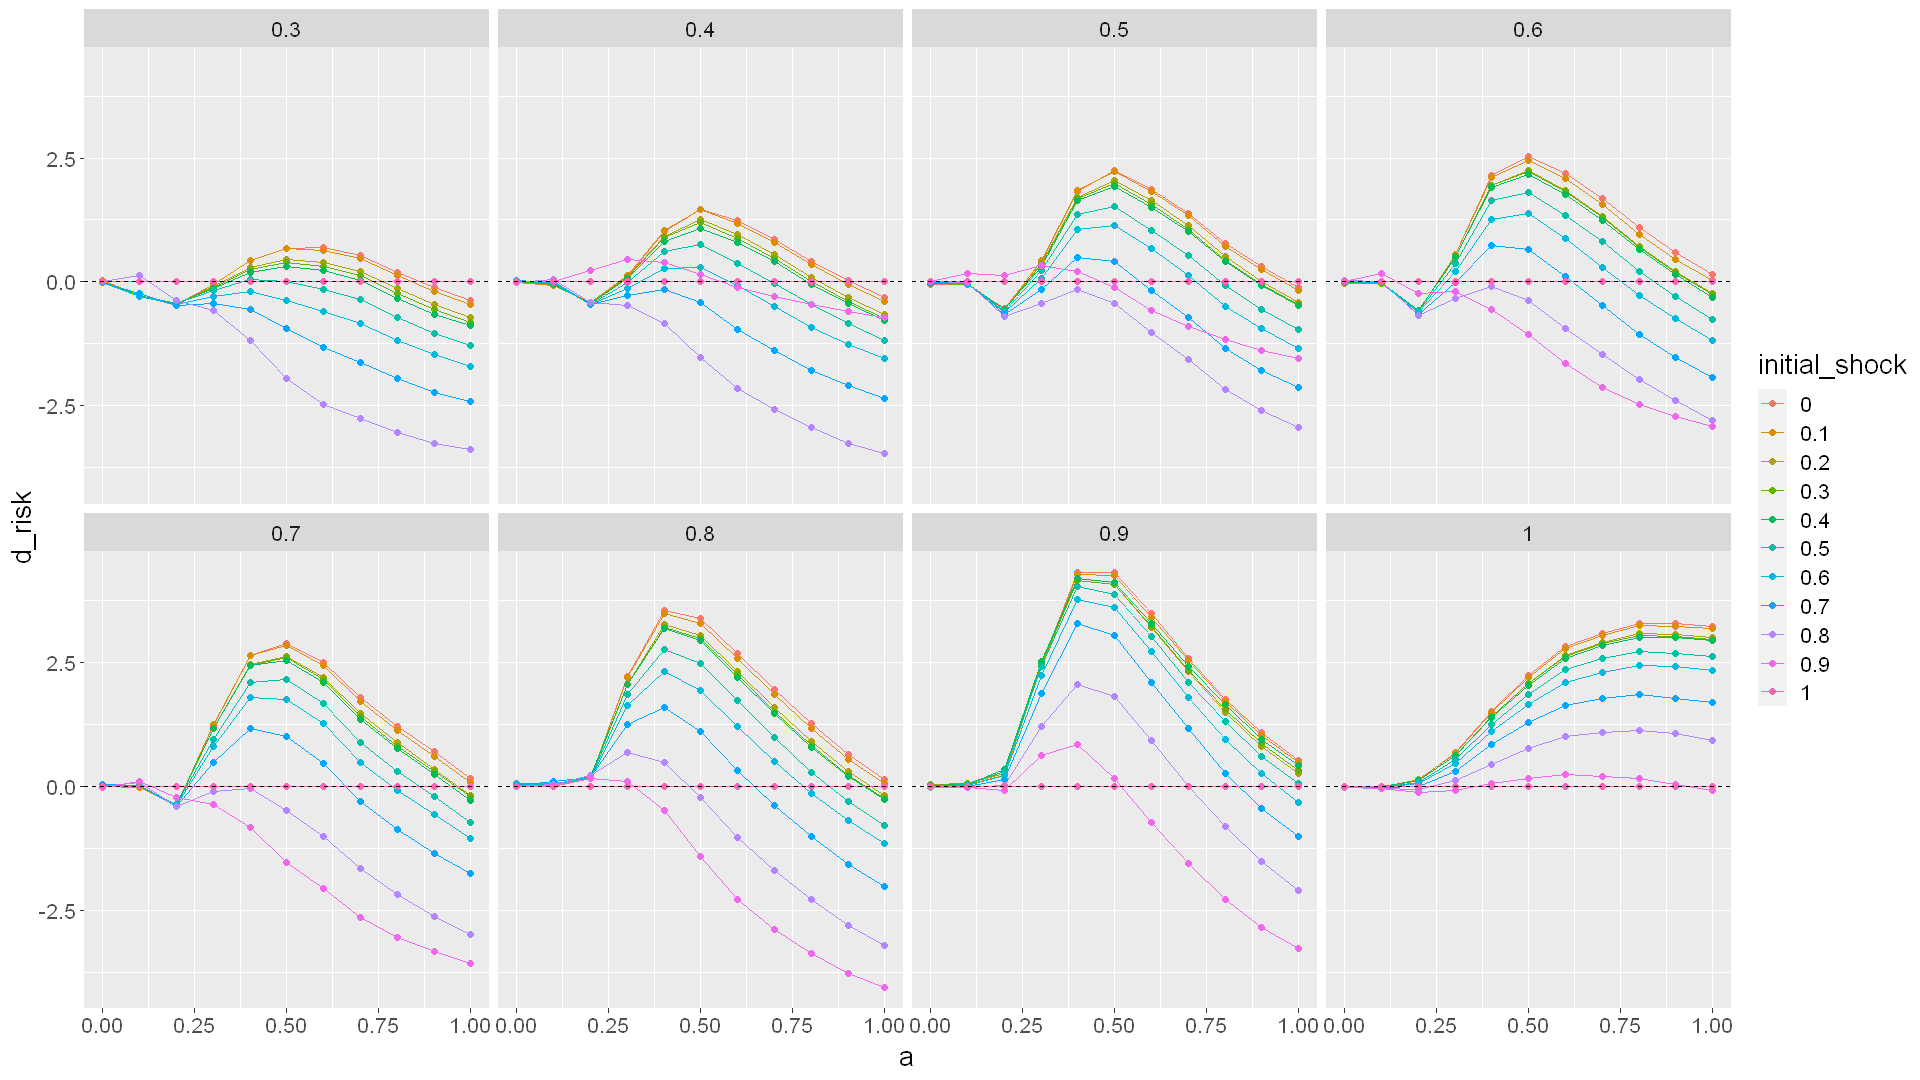

In [22]:
facet_try <- ggplot(data=data_compare, aes(x=a, y=d_risk, group=initial_shock, color=initial_shock)) + geom_line() + 
                geom_point() + geom_hline(yintercept=0.0, linetype='dashed', color='black') +
                theme(text=element_text(size=16))

facet_try + facet_wrap(~exposure_limit, ncol=4)

### Heatmap of difference between risk estimates

**Green** regions show areas where no sqrt applied has lower risk estimates. **Red** regions where no square method has higher risk estimates.

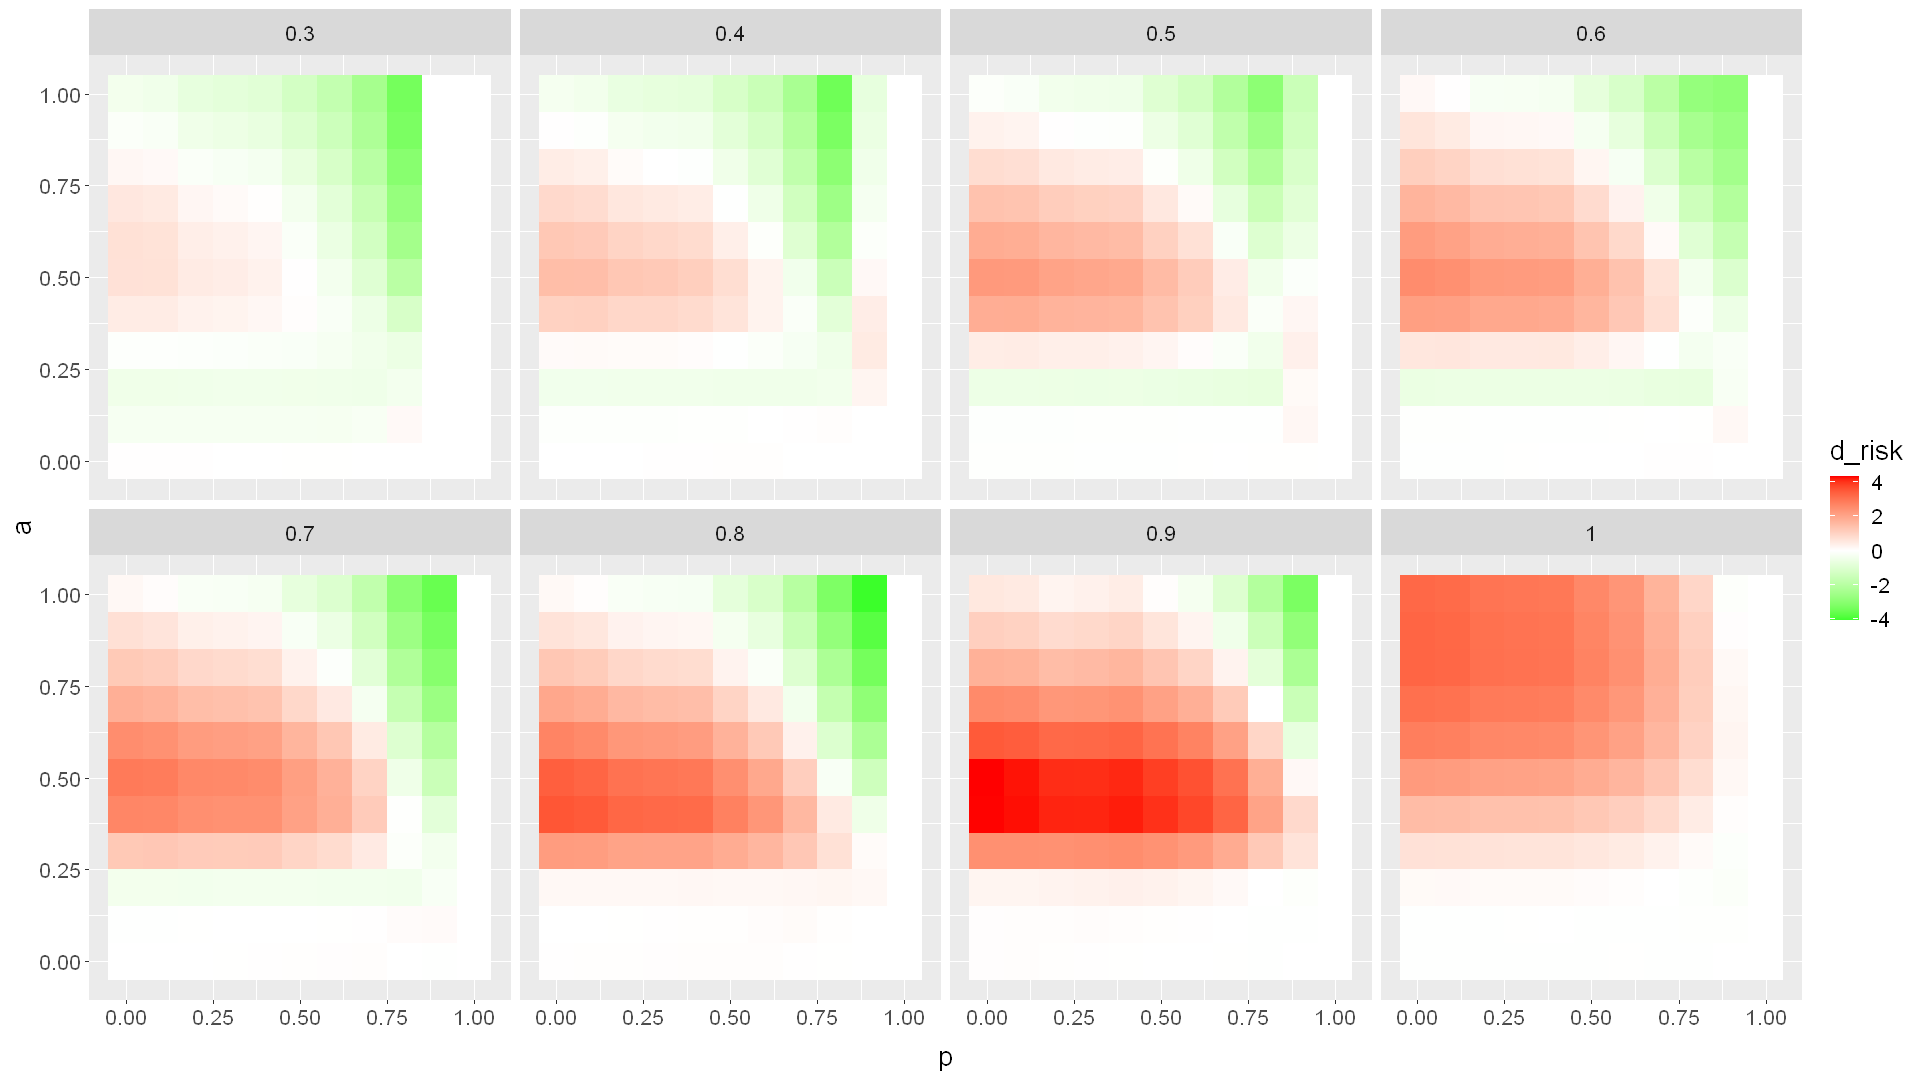

In [23]:
facet_try3 <- ggplot(data=data_compare, aes(x=p, y=a, fill=d_risk)) + geom_tile() + 
                scale_fill_gradient2(low='green', mid='white', high='red', midpoint=0) +
                theme(text=element_text(size=16))
facet_try3 + facet_wrap(~exposure_limit, ncol=4)

# Closing notes:

From the thesis draft, for exposure limit = 0.3, the vertical region for p=0.9, has become unusually high. Thus, we had hoped for an improvement by applying square-root transform to the prior probabilities to mitigate the high risk estimates on this region.

However, from results shown above, the vertical region for p=0.9 at exposure limit = 0.3 is a white colored region meaning the difference in risk estimates between the two appraoaches is almost zero. Thus, no improvement on the noticed problem will be seen.

Finally, the difference between the risk estimates of the two methods range from around -4 to around 4. Where it can be observed from the thesis draft that the ensembles can overestimate or underestimate the risk of the actual network by up to 20 banks. Thus, possible improvements from applying a square-root transform can bring improvements but is likely to be insufficient to fully adjust the model results close to the actual network.